# Voice AI Intent Classification - Exploratory Data Analysis

This notebook explores the Voice AI dataset to understand:
1. Data distribution and quality
2. Language patterns and code-switching
3. Intent class balance
4. ASR confidence distribution
5. Text characteristics

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Load and Inspect Data

In [14]:
# Load datasets
train_df = pd.read_csv('../datasets/voiceai_intent_train.csv')
val_df = pd.read_csv('../datasets/voiceai_intent_val.csv')
test_df = pd.read_csv('../datasets/voiceai_intent_test.csv')

# Combine for full analysis
full_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

print(f"Dataset Sizes:")
print(f"  Train: {len(train_df):,} samples")
print(f"  Val:   {len(val_df):,} samples")
print(f"  Test:  {len(test_df):,} samples")
print(f"  Total: {len(full_df):,} samples")

Dataset Sizes:
  Train: 561 samples
  Val:   70 samples
  Test:  69 samples
  Total: 700 samples


In [15]:
# Basic info
print("Column Info:")
print(full_df.dtypes)
print("\nMissing Values:")
print(full_df.isnull().sum())
print("\nSample Data:")
train_df.head(10)

Column Info:
utterance_id         object
timestamp            object
channel              object
device_type          object
region               object
language             object
utterance_text       object
asr_confidence      float64
duration_seconds      int64
intent               object
split                object
dtype: object

Missing Values:
utterance_id        0
timestamp           0
channel             0
device_type         0
region              0
language            0
utterance_text      0
asr_confidence      0
duration_seconds    0
intent              0
split               0
dtype: int64

Sample Data:


,utterance_id,timestamp,channel,device_type,region,language,utterance_text,asr_confidence,duration_seconds,intent,split
0,utt_00159,2025-11-07T15:32:00,whatsapp_voice_note,feature_phone,Western,en,What are the requirements for ID replacement?,0.902,9,requirements_information,train
1,utt_00501,2025-11-12T10:41:00,voice_call,android,Kigali,en,Am I eligible to apply for ESIA?,0.644,7,service_eligibility,train
2,utt_00397,2025-11-28T17:58:00,ivr,web,Eastern,mixed,Help me reset password yanjye.,0.964,9,reset_password_login_help,train
3,utt_00156,2025-11-25T19:52:00,voice_call,web,Southern,en,I submitted my aplikasiyo but I can't see the ...,0.911,2,check_application_status,train
4,utt_00322,2025-11-24T00:46:00,voice_call,feature_phone,Eastern,en,I want to start a new application for birth ce...,0.810,10,start_new_application,train
5,utt_00213,2025-11-06T23:34:00,mobile_app_voice,android,Eastern,en,What are the requirements for ESIA?,0.942,7,requirements_information,train
6,utt_00235,2025-11-22T09:16:00,voice_call,web,Eastern,en,What are the requirements for driving license?,0.881,7,requirements_information,train
7,utt_00290,2025-11-24T21:29:00,voice_call,ios,Western,en,I paid but it is not confirmed.,0.814,7,payment_help,train
8,utt_00301,2025-10-13T01:54:00,voice_call,feature_phone,Kigali,en,Am I eligible to apply for driving license?,0.821,9,service_eligibility,train
9,utt_00357,2025-12-07T16:36:00,whatsapp_voice_note,ios,Kigali,rw,"Nshaka gusaba attestation y’imisoro, ntangira he?",0.823,4,start_new_application,train


## 2. Intent Distribution

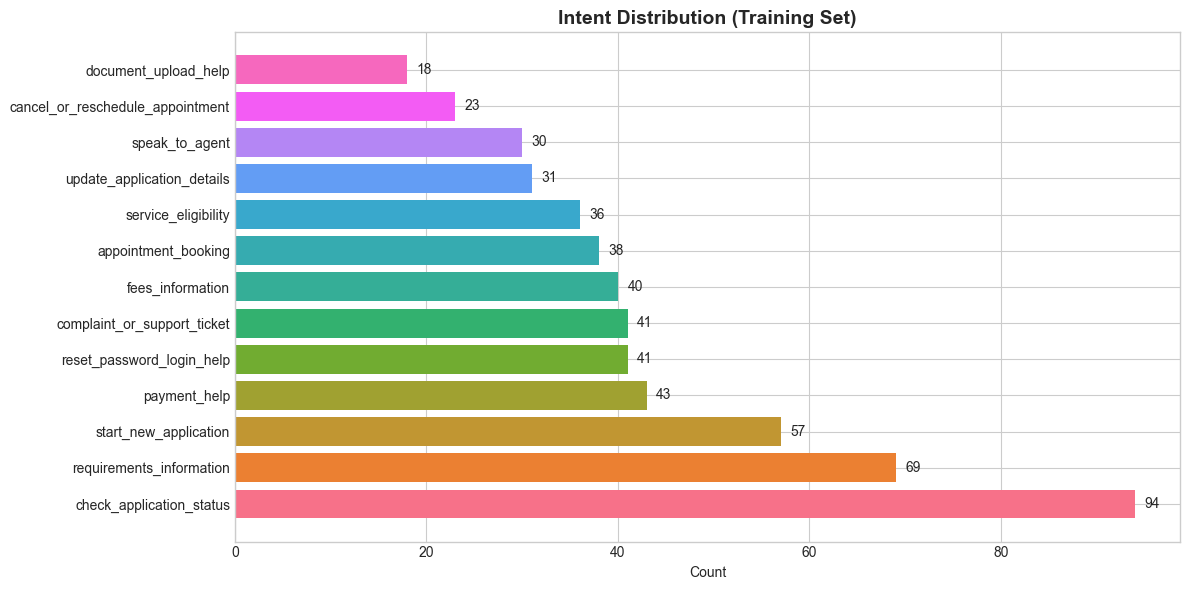


Class Imbalance Analysis:
  Most common intent: check_application_status (94 samples)
  Least common intent: document_upload_help (18 samples)
  Imbalance ratio: 5.22x


In [16]:
# Intent counts
intent_counts = train_df['intent'].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(intent_counts.index, intent_counts.values, color=sns.color_palette('husl', len(intent_counts)))
ax.set_xlabel('Count')
ax.set_title('Intent Distribution (Training Set)', fontsize=14, fontweight='bold')

# Add count labels
for bar, count in zip(bars, intent_counts.values):
    ax.text(count + 1, bar.get_y() + bar.get_height()/2, str(count), va='center')

plt.tight_layout()
plt.savefig('../outputs/plots/intent_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Class imbalance ratio
max_count = intent_counts.max()
min_count = intent_counts.min()
imbalance_ratio = max_count / min_count

print(f"\nClass Imbalance Analysis:")
print(f"  Most common intent: {intent_counts.idxmax()} ({max_count} samples)")
print(f"  Least common intent: {intent_counts.idxmin()} ({min_count} samples)")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}x")

## 3. Language Distribution & Code-Switching Analysis

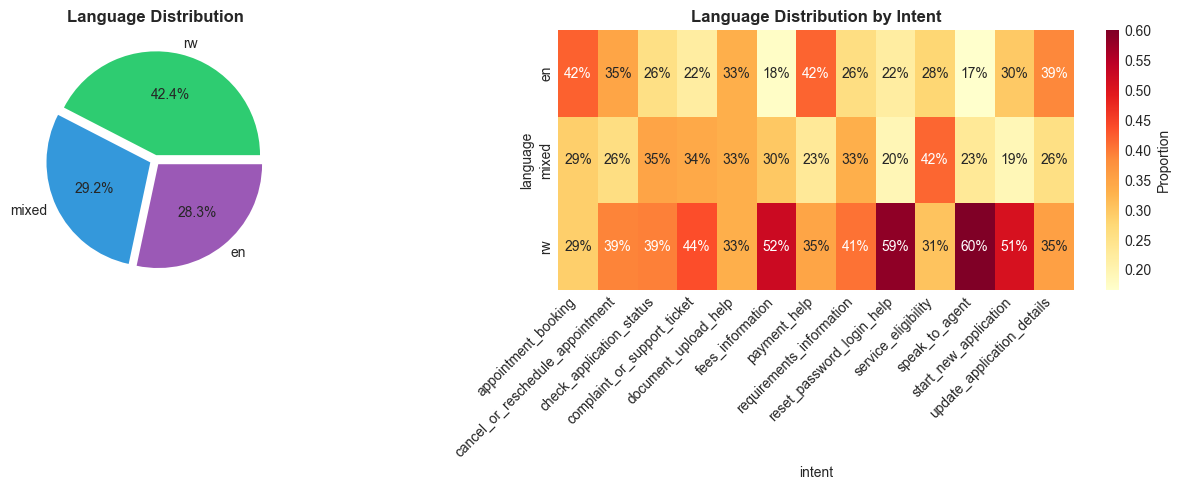

In [6]:
# Language distribution
lang_counts = train_df['language'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#2ecc71', '#3498db', '#9b59b6']
axes[0].pie(lang_counts.values, labels=lang_counts.index, autopct='%1.1f%%', 
            colors=colors, explode=[0.05]*len(lang_counts))
axes[0].set_title('Language Distribution', fontweight='bold')

# Intent by language heatmap
lang_intent = pd.crosstab(train_df['language'], train_df['intent'], normalize='columns')
sns.heatmap(lang_intent, cmap='YlOrRd', annot=True, fmt='.0%', ax=axes[1], cbar_kws={'label': 'Proportion'})
axes[1].set_title('Language Distribution by Intent', fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../outputs/plots/language_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [17]:
# Code-switching examples
print("Code-Switching Examples (mixed language):")
print("="*60)

mixed_samples = train_df[train_df['language'] == 'mixed'].sample(min(10, len(train_df[train_df['language'] == 'mixed'])), random_state=42)
for _, row in mixed_samples.iterrows():
    print(f"\n[{row['intent']}]")
    print(f"  {row['utterance_text']}")

print("\n\nKinyarwanda Examples:")
print("="*60)

rw_samples = train_df[train_df['language'] == 'rw'].sample(min(8, len(train_df[train_df['language'] == 'rw'])), random_state=42)
for _, row in rw_samples.iterrows():
    print(f"\n[{row['intent']}]")
    print(f"  {row['utterance_text']}")

Code-Switching Examples (mixed language):

[appointment_booking]
  Nashaka gufata appointment ya ID replacement i Nyagatare.

[check_application_status]
  Can you check status ya dossier yanjye?

[cancel_or_reschedule_appointment]
  Cancel appointment ya icyemezo cy’ubukwe please.

[update_application_details]
  Help me edit application info.

[payment_help]
  How do I pay for icyemezo cy’ubukwe on mobile money?

[update_application_details]
  I made a mistake muri application, nakosora he?

[check_application_status]
  Ndashaka kureba status ya application yanjye ya marriage certificate.

[service_eligibility]
  Eligibility ya business registration ni iyihe?

[requirements_information]
  What documents nkeneye kuri permis?

[appointment_booking]
  Help me book rendez-vous for marriage certificate.


Kinyarwanda Examples:

[update_application_details]
  Ndashaka kuvugurura application number yanjye.

[reset_password_login_help]
  Nshaka guhindura password yanjye.

[appointment_booking]

## 4. ASR Confidence Analysis

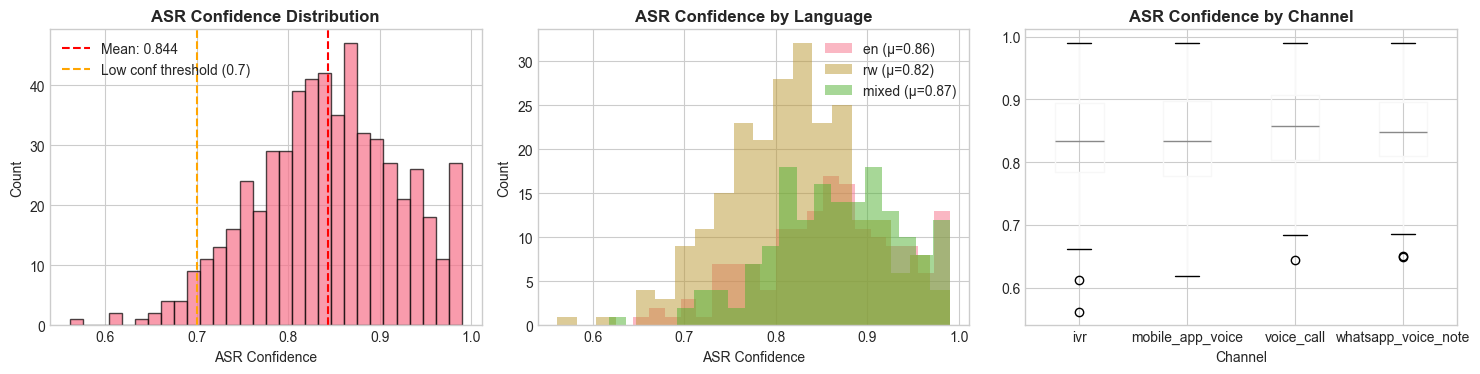


Low ASR Confidence Utterances (< 0.7):
  Count: 23 (4.1% of training data)


In [18]:
# ASR confidence distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Overall distribution
axes[0].hist(train_df['asr_confidence'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(train_df['asr_confidence'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["asr_confidence"].mean():.3f}')
axes[0].axvline(0.7, color='orange', linestyle='--', label='Low conf threshold (0.7)')
axes[0].set_xlabel('ASR Confidence')
axes[0].set_ylabel('Count')
axes[0].set_title('ASR Confidence Distribution', fontweight='bold')
axes[0].legend()

# By language
for lang in ['en', 'rw', 'mixed']:
    subset = train_df[train_df['language'] == lang]['asr_confidence']
    axes[1].hist(subset, bins=20, alpha=0.5, label=f'{lang} (μ={subset.mean():.2f})')
axes[1].set_xlabel('ASR Confidence')
axes[1].set_ylabel('Count')
axes[1].set_title('ASR Confidence by Language', fontweight='bold')
axes[1].legend()

# Boxplot by channel
train_df.boxplot(column='asr_confidence', by='channel', ax=axes[2])
axes[2].set_title('ASR Confidence by Channel', fontweight='bold')
axes[2].set_xlabel('Channel')
plt.suptitle('')

plt.tight_layout()
plt.savefig('../outputs/plots/asr_confidence_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Low ASR confidence analysis
low_asr_threshold = 0.7
low_asr = train_df[train_df['asr_confidence'] < low_asr_threshold]

print(f"\nLow ASR Confidence Utterances (< {low_asr_threshold}):")
print(f"  Count: {len(low_asr)} ({len(low_asr)/len(train_df)*100:.1f}% of training data)")

## 5. Text Characteristics

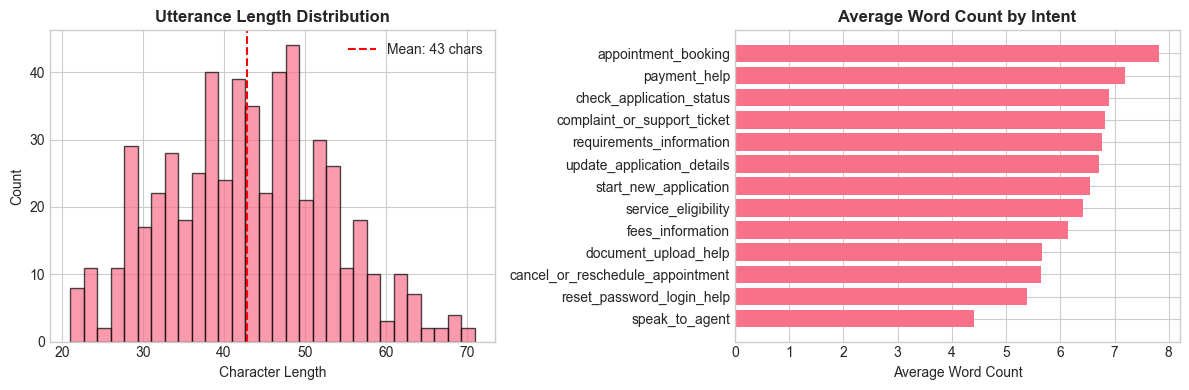

Text Length Statistics:
       text_length  word_count
count   561.000000  561.000000
mean     42.795009    6.495544
std      10.148313    1.668104
min      21.000000    3.000000
25%      35.000000    5.000000
50%      43.000000    6.000000
75%      50.000000    7.000000
max      71.000000   12.000000


In [19]:
# Text length analysis
train_df['text_length'] = train_df['utterance_text'].str.len()
train_df['word_count'] = train_df['utterance_text'].str.split().str.len()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Character length distribution
axes[0].hist(train_df['text_length'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', 
                label=f'Mean: {train_df["text_length"].mean():.0f} chars')
axes[0].set_xlabel('Character Length')
axes[0].set_ylabel('Count')
axes[0].set_title('Utterance Length Distribution', fontweight='bold')
axes[0].legend()

# Word count by intent
intent_word_counts = train_df.groupby('intent')['word_count'].mean().sort_values()
axes[1].barh(intent_word_counts.index, intent_word_counts.values)
axes[1].set_xlabel('Average Word Count')
axes[1].set_title('Average Word Count by Intent', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/plots/text_characteristics.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Text Length Statistics:")
print(train_df[['text_length', 'word_count']].describe())

## 6. Channel, Device & Region Analysis

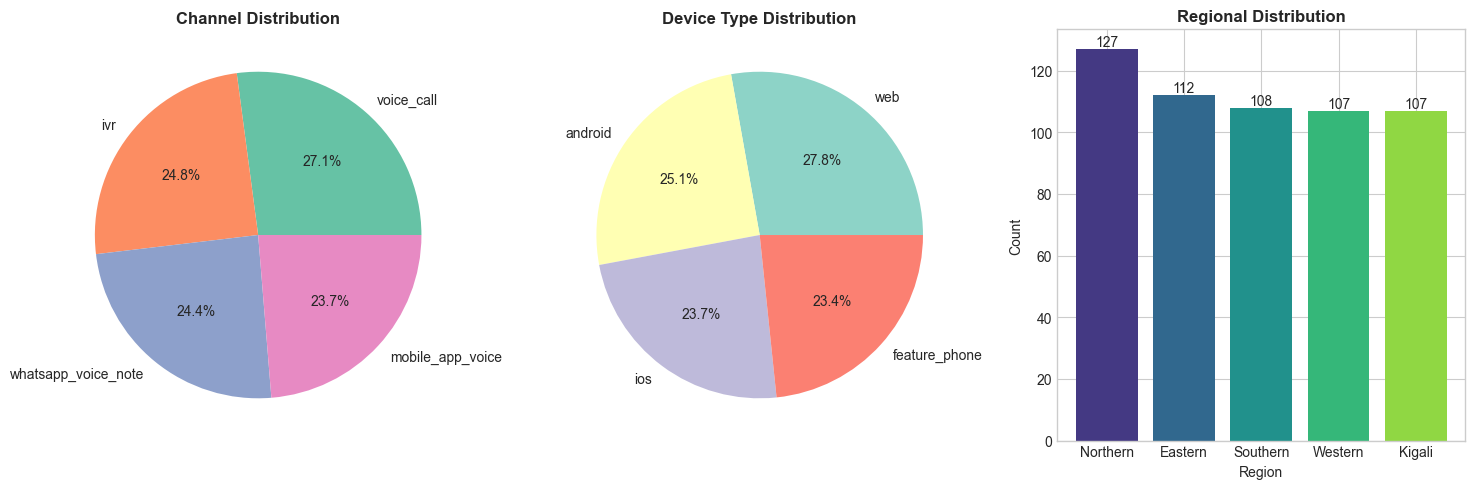

In [20]:
# Channel and device distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Channel counts
channel_counts = train_df['channel'].value_counts()
axes[0].pie(channel_counts.values, labels=channel_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('Set2', len(channel_counts)))
axes[0].set_title('Channel Distribution', fontweight='bold')

# Device type counts
device_counts = train_df['device_type'].value_counts()
axes[1].pie(device_counts.values, labels=device_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('Set3', len(device_counts)))
axes[1].set_title('Device Type Distribution', fontweight='bold')

# Region distribution
region_counts = train_df['region'].value_counts()
bars = axes[2].bar(region_counts.index, region_counts.values, color=sns.color_palette('viridis', len(region_counts)))
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Count')
axes[2].set_title('Regional Distribution', fontweight='bold')
for bar, count in zip(bars, region_counts.values):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(count), ha='center')

plt.tight_layout()
plt.savefig('../outputs/plots/channel_device_region.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Summary & Key Insights

In [21]:
print("="*60)
print("EDA SUMMARY")
print("="*60)

print(f"""
DATASET OVERVIEW:
   - Total samples: {len(full_df):,}
   - Train/Val/Test split: {len(train_df)}/{len(val_df)}/{len(test_df)}
   - Number of intents: {train_df['intent'].nunique()}
   - Languages: {', '.join(train_df['language'].unique())}

CLASS BALANCE:
   - Imbalance ratio: {imbalance_ratio:.2f}x (moderate imbalance)
   - Most common: {intent_counts.idxmax()} ({max_count} samples)
   - Least common: {intent_counts.idxmin()} ({min_count} samples)
   -> Recommendation: Use Focal Loss or class weights

LANGUAGE DISTRIBUTION:
   - English: {(train_df['language'] == 'en').sum()} ({(train_df['language'] == 'en').mean()*100:.1f}%)
   - Kinyarwanda: {(train_df['language'] == 'rw').sum()} ({(train_df['language'] == 'rw').mean()*100:.1f}%)
   - Mixed: {(train_df['language'] == 'mixed').sum()} ({(train_df['language'] == 'mixed').mean()*100:.1f}%)
   -> Recommendation: Multilingual model (XLM-RoBERTa) essential

ASR QUALITY:
   - Mean confidence: {train_df['asr_confidence'].mean():.3f}
   - Low confidence (<0.7): {(train_df['asr_confidence'] < 0.7).sum()} samples ({(train_df['asr_confidence'] < 0.7).mean()*100:.1f}%)
   -> Recommendation: Light preprocessing, preserve code-switching

TEXT CHARACTERISTICS:
   - Avg length: {train_df['text_length'].mean():.0f} chars, {train_df['word_count'].mean():.1f} words
   - Max length: {train_df['text_length'].max()} chars
   -> Recommendation: max_length=128 sufficient for tokenization

DATA QUALITY:
   - ~3% label noise (as documented)
   - Some ASR spelling errors present
   -> Recommendation: Robust model + careful preprocessing
""")

print("="*60)
print("EDA Complete!")

EDA SUMMARY

DATASET OVERVIEW:
   - Total samples: 700
   - Train/Val/Test split: 561/70/69
   - Number of intents: 13
   - Languages: en, mixed, rw

CLASS BALANCE:
   - Imbalance ratio: 5.22x (moderate imbalance)
   - Most common: check_application_status (94 samples)
   - Least common: document_upload_help (18 samples)
   -> Recommendation: Use Focal Loss or class weights

LANGUAGE DISTRIBUTION:
   - English: 159 (28.3%)
   - Kinyarwanda: 238 (42.4%)
   - Mixed: 164 (29.2%)
   -> Recommendation: Multilingual model (XLM-RoBERTa) essential

ASR QUALITY:
   - Mean confidence: 0.844
   - Low confidence (<0.7): 23 samples (4.1%)
   -> Recommendation: Light preprocessing, preserve code-switching

TEXT CHARACTERISTICS:
   - Avg length: 43 chars, 6.5 words
   - Max length: 71 chars
   -> Recommendation: max_length=128 sufficient for tokenization

DATA QUALITY:
   - ~3% label noise (as documented)
   - Some ASR spelling errors present
   -> Recommendation: Robust model + careful preprocessing